<a href="https://colab.research.google.com/github/aniket-alt/Clustering_Assignment/blob/main/Task(g)_Document_Clustering_using_LLM_Embeddings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 493.7/493.7 kB 11.1 MB/s eta 0:00:00


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

--- Document Clustering Results ---

Cluster 0:
  - The golden retriever barked at the mailman.
  - Dogs are loyal companions known as man's best friend.

Cluster 1:
  - The double-slit experiment demonstrates wave-particle duality.
  - Quantum physics is the study of matter and energy at the most fundamental level.

Cluster 2:
  - A cat is a small carnivorous mammal with soft fur.
  - The kitten chased the laser pointer across the room.

Cluster 3:
  - The restaurant serves the best pasta and red wine in the city.
  - I really enjoyed the spicy garlic shrimp for dinner.


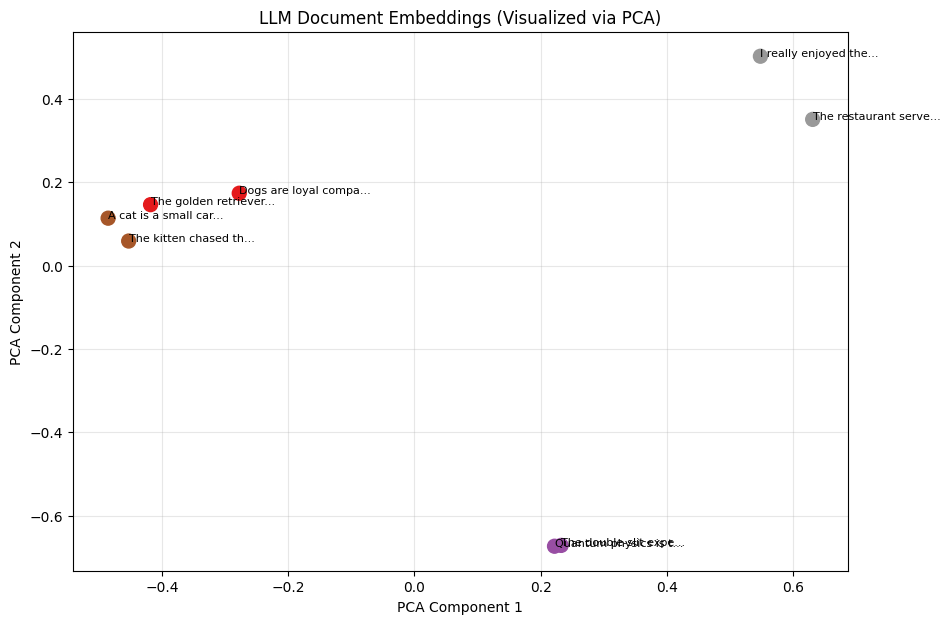

In [1]:
# 1. Install the Sentence Transformers library
!pip install -U sentence-transformers -q

from sentence_transformers import SentenceTransformer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# 2. DEFINE THE DOCUMENTS (Text Data)
# I've curated a list of sentences from three distinct "topics"
# to see if the LLM can group them correctly.
documents = [
    "A cat is a small carnivorous mammal with soft fur.",
    "The kitten chased the laser pointer across the room.",
    "Dogs are loyal companions known as man's best friend.",
    "The golden retriever barked at the mailman.",
    "Quantum physics is the study of matter and energy at the most fundamental level.",
    "The double-slit experiment demonstrates wave-particle duality.",
    "The restaurant serves the best pasta and red wine in the city.",
    "I really enjoyed the spicy garlic shrimp for dinner."
]

# 3. CONVERT TEXT TO EMBEDDINGS (Using an LLM)
# 'all-MiniLM-L6-v2' is fast, lightweight, and very accurate.
model = SentenceTransformer('all-MiniLM-L6-v2')
embeddings = model.encode(documents)

# 4. PERFORM CLUSTERING
# Since we have roughly 4 topics (Cats, Dogs, Science, Food), let's try K=4.
num_clusters = 4
kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(embeddings)

# 5. ORGANIZE AND PRINT RESULTS
df = pd.DataFrame({'Document': documents, 'Cluster': cluster_labels})
df = df.sort_values(by='Cluster')

print("--- Document Clustering Results ---")
for cluster_id in range(num_clusters):
    print(f"\nCluster {cluster_id}:")
    group = df[df['Cluster'] == cluster_id]['Document'].values
    for doc in group:
        print(f"  - {doc}")

# 6. VISUALIZATION (PCA)
# Embeddings are high-dimensional (384D). We use PCA to squash them into 2D for plotting.
pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(embeddings)

plt.figure(figsize=(10, 7))
scatter = plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1], c=cluster_labels, cmap='Set1', s=100)
plt.title("LLM Document Embeddings (Visualized via PCA)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")

# Add labels to the dots so we can see which sentence is where
for i, txt in enumerate(documents):
    plt.annotate(txt[:20] + "...", (reduced_embeddings[i, 0], reduced_embeddings[i, 1]), size=8)

plt.grid(True, alpha=0.3)
plt.show()